In [ ]:
%tensorflow_version 2.x

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from google.colab import files
from google.colab import drive
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import to_categorical
from sklearn.metrics import plot_confusion_matrix
from scipy.stats import levy_l, skewnorm, skew
import csv
import pandas as pd
from google.colab import files
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from keras.regularizers import l2
import tensorflow as tf
from tensorflow import lite
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
mod1 = load_model('/content/MD.h5')

In [ ]:
converter=lite.TFLiteConverter.from_keras_model(Model)
tfmodel=converter.convert()
open('MOD.tflite','wb').write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmpmr2j6ni5/assets


22612

In [ ]:
uploaded = files.upload()

Saving ProjectData.csv to ProjectData.csv


In [ ]:
data = pd.read_csv('/content/ProjectData.csv')

In [ ]:
data = data.values

In [ ]:
np.random.shuffle(data)

In [ ]:
X = data[:, :7]
Y = data[:, -1]

In [ ]:
X.shape

(644, 7)

In [ ]:
X = np.array(X).reshape(644,7,)
Y = np.array(Y).reshape(-1,)

In [ ]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.10)

In [ ]:
X_train.shape

(579, 7)

In [ ]:
Model = Sequential()
Model.add(Dense(32, 'relu', input_shape=(7,)))
Model.add(Dense(64, 'relu'))
Model.add(Dense(32, 'relu'))
Model.add(Dense(16, 'relu'))
Model.add(Dense(1, 'sigmoid'))
Model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
Model.fit(X, Y, batch_size=16, epochs=20, validation_split=0.2)

Epoch 1/20
33/33 [==============================] - 3s 9ms/step - loss: 0.8391 - accuracy: 0.4963 - val_loss: 0.6254 - val_accuracy: 0.5271
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.6336 - accuracy: 0.6234 - val_loss: 0.6159 - val_accuracy: 0.5116
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5871 - accuracy: 0.6394 - val_loss: 0.6264 - val_accuracy: 0.4961
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 0.5116 - accuracy: 0.8066 - val_loss: 0.5333 - val_accuracy: 0.5271
Epoch 5/20
33/33 [==============================] - 0s 4ms/step - loss: 0.4690 - accuracy: 0.7780 - val_loss: 0.3946 - val_accuracy: 0.9147
Epoch 6/20
33/33 [==============================] - 0s 3ms/step - loss: 0.3821 - accuracy: 0.9525 - val_loss: 0.3494 - val_accuracy: 0.8605
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.3396 - accuracy: 0.8766 - val_loss: 0.3231 - val_accuracy: 0.8372
Epoch 8/20
33/33 [==

In [ ]:
estimator = KerasClassifier(Model, epochs=20, batch_size=5, verbose=0)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X, Y, cv=kfold)
print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

[nan nan nan nan nan nan nan nan nan nan]
Baseline: nan% (nan%)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: The first argument to `Layer.call` must always be passed.

  FitFailedWarning)


In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 17        
Total params: 4,993
Trainable params: 4,993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist=Model.history

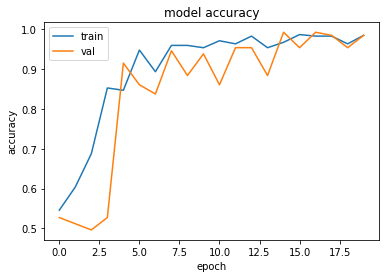

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

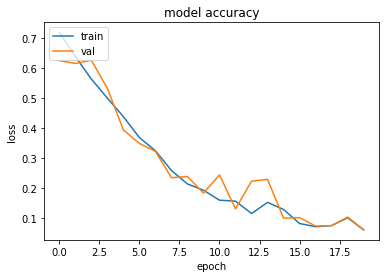

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plot_confusion_matrix(Model, X, Y)

In [ ]:
r=Model.predict_classes(X)
r

In [ ]:
alpha0=0
alpha1=0
beta0=0
beta1=0
for i in range(0,644):
  if r[i] == Y[i] and r[i][0] == 0:
    alpha0 +=1
  if r[i] == Y[i] and r[i][0] == 1:
    alpha1 +=1
  if r[i] != Y[i] and r[i][0] == 0:
    beta0 +=1
  if r[i] != Y[i] and r[i][0] == 1:
    beta1 +=1
print(alpha0, alpha1, beta0, beta1)

309 328 6 1


In [ ]:
Model.save('MD.h5')

In [ ]:
Model.predict(X[1].reshape(1, 7))

array([[0.9999943]], dtype=float32)

In [ ]:
_model = Sequential()
_model.add(Conv1D(filters=32, kernel_size = 1, strides=1, activation='relu', input_shape=(6, 1)))
_model.add(Conv1D(filters=64, kernel_size = 1, activation='relu'))
_model.add(AveragePooling1D(pool_size=2))
_model.add(Conv1D(filters=64, kernel_size = 1, activation='relu'))
_model.add(Flatten())
_model.add(Dense(64, activation='relu'))
_model.add(Dense(2, kernel_regularizer=l2(0.1), activation = 'linear'))
_model.compile(loss='squared_hinge', optimizer='adadelta', metrics=['accuracy'])

In [ ]:
_model.fit(X, Y, batch_size=16, epochs=20, validation_split=0.2)

Epoch 1/20
33/33 [==============================] - 0s 6ms/step - loss: 1.0445 - accuracy: 0.0835 - val_loss: 1.0586 - val_accuracy: 0.0930
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 1.0436 - accuracy: 0.0854 - val_loss: 1.0581 - val_accuracy: 0.0930
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 1.0424 - accuracy: 0.0854 - val_loss: 1.0578 - val_accuracy: 0.0698
Epoch 4/20
33/33 [==============================] - 0s 4ms/step - loss: 1.0416 - accuracy: 0.0854 - val_loss: 1.0559 - val_accuracy: 0.0930
Epoch 5/20
33/33 [==============================] - 0s 4ms/step - loss: 1.0404 - accuracy: 0.0835 - val_loss: 1.0547 - val_accuracy: 0.0930
Epoch 6/20
33/33 [==============================] - 0s 4ms/step - loss: 1.0397 - accuracy: 0.0932 - val_loss: 1.0541 - val_accuracy: 0.0930
Epoch 7/20
33/33 [==============================] - 0s 4ms/step - loss: 1.0385 - accuracy: 0.0835 - val_loss: 1.0539 - val_accuracy: 0.0930
Epoch 8/20
33/33 [==

In [ ]:
P = np.array(P).reshape(100,600,1)
Q = np.array(Q).reshape(-1, 1)
print(P.shape)

(100, 600, 1)


In [ ]:
_model = Sequential()
_model.add(Conv1D(filters=32, kernel_size = 1, strides=1, activation='relu', input_shape=(600, 1)))
_model.add(AveragePooling1D(pool_size=2))
_model.add(Conv1D(filters=64, kernel_size = 1, activation='relu'))
_model.add(AveragePooling1D(pool_size=2))
_model.add(Conv1D(filters=64, kernel_size = 1, activation='relu'))
_model.add(AveragePooling1D(pool_size=2))
_model.add(Dropout(0.20))
_model.add(Conv1D(filters=32, kernel_size = 1, activation='relu'))
_model.add(AveragePooling1D(pool_size=2))
_model.add(Conv1D(filters=32, kernel_size = 1, activation='relu'))
_model.add(Flatten())
_model.add(Dense(64, activation='relu'))
_model.add(Dense(2, kernel_regularizer=regularizers.l2(0.0001), activation = 'linear'))
_model.compile(loss='squared_hinge', optimizer='adadelta', metrics=['accuracy'])

NameError: ignored

In [ ]:
hist = _model.fit(P, Q, epochs = 20, batch_size=64, verbose=0, val)

In [ ]:
y = Q.reshape(100, )

In [ ]:
Q

In [ ]:
co = 0
for i in range(100):
  if a[i] == y[i]:
    co+=1
print(co)

55


In [ ]:
a = M.predict_classes(P)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
a = []
for i in range(39):
  a.append(1)
for i in range(39, 50):
  a.append(0)
for i in range(50, 92):
  a.append(0)
for i in range(92, 100):
  a.append(1)

In [ ]:
M = load_model("/content/alpha.h5")

In [ ]:
confusion_matrix(y, y_)

array([[42,  8],
       [11, 39]])

In [ ]:
M.summary()

Model: "sequential_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_206 (Conv1D)          (None, 598, 32)           128       
_________________________________________________________________
average_pooling1d_174 (Avera (None, 299, 32)           0         
_________________________________________________________________
conv1d_207 (Conv1D)          (None, 297, 64)           6208      
_________________________________________________________________
average_pooling1d_175 (Avera (None, 148, 64)           0         
_________________________________________________________________
conv1d_208 (Conv1D)          (None, 146, 64)           12352     
_________________________________________________________________
average_pooling1d_176 (Avera (None, 73, 64)            0         
_________________________________________________________________
dropout_24 (Dropout)         (None, 73, 64)          

In [ ]:
data = pd.read_csv("/content/XT (2).csv")

In [ ]:
D = data.values

In [ ]:
D.shape

(100, 601)

In [ ]:
D = D.astype('int')

In [ ]:
D

array([[97, 91, 94, ..., 98, 99,  1],
       [98, 98, 98, ..., 91, 98,  1],
       [98, 95, 98, ..., 96, 97,  1],
       ...,
       [84, 87, 87, ..., 90, 95,  0],
       [89, 81, 85, ..., 90, 91,  0],
       [79, 95, 91, ..., 87, 91,  0]])

In [ ]:
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/gdrive/My Drive/ApneaData.csv")

In [ ]:
np.random.shuffle(D)

In [ ]:
P = []
Q = []

In [ ]:
for i in range(100):
  L = []
  for k in range(600):
    L.append(D[i][k])
  P.append(L)
  Q.append(D[i][-1])

In [ ]:
P = np.array(P)
Q = np.array(Q)

In [ ]:
print(P.shape, Q.shape)

(100, 600) (100,)


In [ ]:
Q = np.array(Q).reshape([-1, 1])
Q.shape

(100, 1)

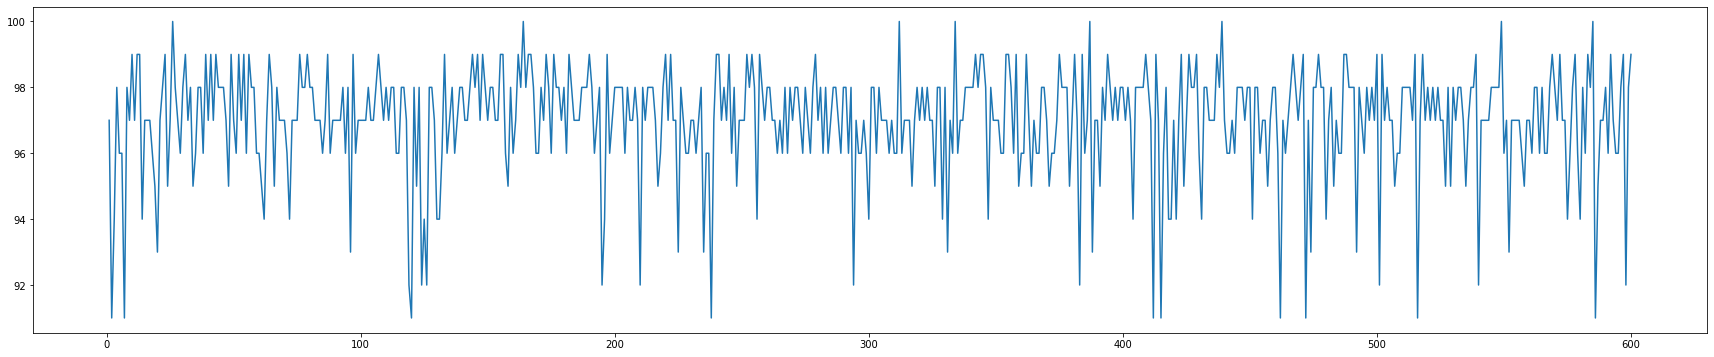

In [ ]:
X = np.arange(1, 601)
Y = P[0]
plt.figure(figsize=(30, 6))
plt.plot(X, Y)

In [ ]:
X_train, X_test, Y_train, Y_test = tts(P, Q, test_size=0.10)

In [ ]:
model = RFC(n_estimators = 100, random_state=0,max_depth = 20)
model.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
X_train.shape[0]

13288

In [ ]:
pred = []
for i in range(X_test.shape[0]):
  pred.append(model.predict([X_test[i]]))

In [ ]:
score = accuracy_score(pred, Y_test)*100

In [ ]:
print(score)

66.56635570267831


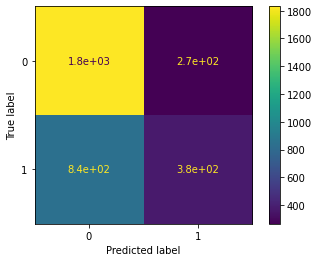

In [ ]:
plot_confusion_matrix(model, X_test, Y_test)

In [ ]:
X_train = X_train.reshape((13288, 6000, 1))
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train = np.expand_dims(X_train, 2)
X_test = np.expand_dims(X_test, 2)

In [ ]:
X_alpha = np.abs(X_train)
X_beta = np.abs(X_test)

In [ ]:
print(X_train.shape)

(80, 600, 1)


In [ ]:
print(Y_train.shape)

(80, 1)


In [ ]:
_model = Sequential()
_model.add(Conv1D(filters=32, kernel_size = 3, strides=1, activation='relu', input_shape=(600, 1)))
_model.add(AveragePooling1D(pool_size=2))
_model.add(Conv1D(filters=64, kernel_size = 3, activation='relu'))
_model.add(AveragePooling1D(pool_size=2))
_model.add(Conv1D(filters=64, kernel_size = 3, activation='relu'))
_model.add(AveragePooling1D(pool_size=2))
_model.add(Dropout(0.20))
_model.add(Conv1D(filters=32, kernel_size = 3, activation='relu'))
_model.add(AveragePooling1D(pool_size=2))
_model.add(Conv1D(filters=32, kernel_size = 3, activation='relu'))
_model.add(Flatten())
_model.add(Dense(64, activation='relu'))
_model.add(Dense(2, kernel_regularizer=regularizers.l2(0.0001), activation = 'linear'))
_model.compile(loss='squared_hinge', optimizer='adadelta', metrics=['accuracy'])

In [ ]:
_model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_28 (Conv1D)           (None, 598, 16)           64        
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 596, 32)           1568      
_________________________________________________________________
max_pooling1d_25 (MaxPooling (None, 298, 32)           0         
_________________________________________________________________
dropout_14 (Dropout)         (None, 298, 32)           0         
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 296, 32)           3104      
_________________________________________________________________
conv1d_31 (Conv1D)           (None, 294, 64)           6208      
_________________________________________________________________
max_pooling1d_26 (MaxPooling (None, 147, 64)          

In [ ]:
hist = _model.fit(X_train, Y_train, epochs = 20, batch_size=64, verbose=0, validation_data=(X_test, Y_test))

In [ ]:
hist.history 

{'accuracy': [0.4749999940395355,
  0.512499988079071,
  0.512499988079071,
  0.44999998807907104,
  0.5,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896,
  0.48750001192092896],
 'loss': [3.8307442665100098,
  2.4537816047668457,
  0.8666707277297974,
  1.0094563961029053,
  0.7273284196853638,
  0.6940912008285522,
  0.693205714225769,
  0.6932511329650879,
  0.6932511925697327,
  0.6932450532913208,
  0.693246066570282,
  0.6932367086410522,
  0.6932367086410522,
  0.6932293176651001,
  0.69325190782547,
  0.6932417750358582,
  0.6932500004768372,
  0.6932469606399536,
  0.6932497620582581,
  0.693242073059082],
 'val_accuracy': [0.44999998807907104,
  0.44999998807907104,
  0.550000011920929,
  0.550000011920929,


In [ ]:
acc = _model.evaluate(X_test, Y_test)

104/104 [==============================] - 1s 6ms/step - loss: 0.3825 - accuracy: 0.8390


In [ ]:
f = _model.predict_classes(X_beta)

In [ ]:
f

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], dtype=int32)

In [ ]:
count = 0
for i in range(len(f)):
  if f[i] == 0:
    count +=1
print(count)

2474


In [ ]:
Data = []
s = np.random.normal(loc = 96, scale = 4, size = 10)

In [ ]:
f = np.random.normal(loc = 98, scale = 1, size = 100)

94.52


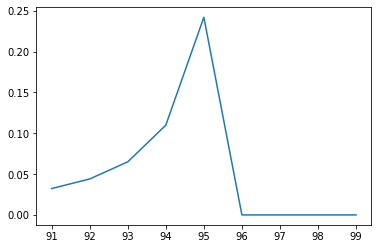

In [ ]:
num = levy_l.numargs
a, b = 96, 1
rv = levy_l(a, b)  
quantile = np.arange (0.03, 2, 0.21) 
R = levy_l.rvs(a, b)
R = levy_l.pdf(a, b, quantile)  
distribution = np.linspace(91, np.maximum(rv.dist.b, 99), dtype = 'int')  
print(np.mean(distribution))
plt.plot(distribution, rv.pdf(distribution))

In [ ]:
T = skewnorm.pdf([1, 2, 3, 4, 5], 0, 4, 2)

In [ ]:
a = 4
mean, var, skew, kurt = skewnorm.stats(a, moments='mvsk')

In [ ]:
x = np.linspace(1, 10, 100, endpoint = True, dtype = 'int')

In [ ]:
y = 1/(np.sqrt(2*np.pi))*np.exp(-.5*(x)**2)

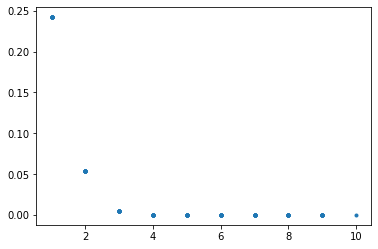

In [ ]:
plt.plot(x, y, '.')

[-2.5758293  -2.54674938 -2.51766945 -2.48858952 -2.45950959 -2.43042966
 -2.40134973 -2.3722698  -2.34318987 -2.31410994 -2.28503001 -2.25595009
 -2.22687016 -2.19779023 -2.1687103  -2.13963037 -2.11055044 -2.08147051
 -2.05239058 -2.02331065 -1.99423072 -1.9651508  -1.93607087 -1.90699094
 -1.87791101 -1.84883108 -1.81975115 -1.79067122 -1.76159129 -1.73251136
 -1.70343143 -1.67435151 -1.64527158 -1.61619165 -1.58711172 -1.55803179
 -1.52895186 -1.49987193 -1.470792   -1.44171207 -1.41263214 -1.38355222
 -1.35447229 -1.32539236 -1.29631243 -1.2672325  -1.23815257 -1.20907264
 -1.17999271 -1.15091278 -1.12183285 -1.09275292 -1.063673   -1.03459307
 -1.00551314 -0.97643321 -0.94735328 -0.91827335 -0.88919342 -0.86011349
 -0.83103356 -0.80195363 -0.77287371 -0.74379378 -0.71471385 -0.68563392
 -0.65655399 -0.62747406 -0.59839413 -0.5693142  -0.54023427 -0.51115434
 -0.48207442 -0.45299449 -0.42391456 -0.39483463 -0.3657547  -0.33667477
 -0.30759484 -0.27851491 -0.24943498 -0.22035505 -0

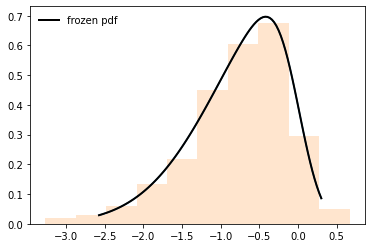

In [ ]:
a = -4
mean, var, skew, kurt = skewnorm.stats(a, moments = 'mvsk')
x = np.linspace(skewnorm.ppf(0.01, a), skewnorm.ppf(0.99, a), 100)
print(x)
plt.plot(x, skewnorm.pdf(x, a))
rv = skewnorm(a)
plt.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
vals = skewnorm.pdf([0.001, 0.5, 0.999], a)
np.allclose([0.001, 0.5, 0.999], skewnorm.cdf(vals, a))
r = skewnorm.rvs(a,size = 1000)
plt.hist(r, density = True, histtype = 'stepfilled', alpha = 0.2)
plt.legend(loc = 'best', frameon = False)
plt.show()

In [ ]:
F = np.linspace(91, 99, 720, dtype = 'int')

In [ ]:
X = {91:0, 92:0, 93:0, 94:0, 95:0, 96:0, 97:0, 98:0, 99:0}

In [ ]:
for i in F:
  X[i]+=1
print(X)

{91: 90, 92: 90, 93: 90, 94: 90, 95: 90, 96: 90, 97: 90, 98: 89, 99: 1}


In [ ]:
720*96

69120

In [ ]:
skewnorm.ppf(0.000000000, -5)

-6.466951087736388

In [ ]:
S = []

In [ ]:
data = np.random.normal(90, 4, 506)
data = data.astype(int)

In [ ]:
data1 = np.linspace(79, 89, 59, dtype = 'int')

In [ ]:
data = np.concatenate((data, data1))

In [ ]:
data2 = np.linspace(69, 79, 35, dtype = 'int')

In [ ]:
data = np.concatenate((data, data2))

In [ ]:
np.mean(data)

87.935

In [ ]:
D = {}
for i in range(91, 101):
  D.update({i:0})

In [ ]:
for i in data:
  D[i]=0
for i in data:
  D[i]+=1
D

{69: 4,
 70: 3,
 71: 4,
 72: 3,
 73: 3,
 74: 4,
 75: 3,
 76: 4,
 77: 4,
 78: 3,
 79: 8,
 80: 9,
 81: 10,
 82: 16,
 83: 17,
 84: 29,
 85: 38,
 86: 37,
 87: 44,
 88: 45,
 89: 60,
 90: 52,
 91: 44,
 92: 50,
 93: 32,
 94: 31,
 95: 17,
 96: 7,
 97: 4,
 98: 9,
 99: 3,
 100: 3}

In [ ]:
alpha = []
for i in range(99):
  if i in D:
    for j in range(D[i]):
      alpha.append(i)

In [ ]:
len(alpha)

594

In [ ]:
for i in range(99, 110):
  if i in D:
    for j in range(D[i]):
      alpha.append(92)

In [ ]:
len(alpha)

600

In [ ]:
data = np.array(alpha)

In [ ]:
np.random.shuffle(data)

In [ ]:
FP = np.array([0])


In [ ]:
data = np.concatenate((data, FP))

In [ ]:
S.append(data)

In [ ]:
G = []
G = S

In [ ]:
D = np.array(G)

In [ ]:
np.savetxt('/content/XT.csv', D, delimiter = ',')

In [ ]:
data

array([ 94,  98,  98, 100,  97,  99,  94,  96,  94,  97,  97,  98,  95,
        98,  94,  97,  98,  98,  96,  97,  99,  98,  98,  97,  98,  97,
        99,  99,  97,  97,  97,  94,  99,  98,  99,  93,  97,  93,  98,
        97,  98,  99,  98,  97,  98,  97,  98,  97,  98,  98,  92,  97,
        97,  95,  92,  96,  94,  99,  98,  95,  96,  98,  94,  98,  99,
        98,  96,  98,  98,  99,  97,  97,  94,  98,  99,  97,  98,  97,
        97,  96,  97,  98,  97,  98,  99,  97,  98,  97,  98,  98,  95,
        98,  99,  98,  97,  95,  98,  99,  96,  96,  98,  96,  97,  97,
        96,  98,  96,  97,  98,  97,  97,  98,  98,  97,  98,  98,  97,
        99,  97,  99,  97,  96,  96,  98,  99,  97,  97,  92,  99,  97,
        98,  96,  97,  98,  96,  98,  98,  96,  98,  97,  97,  96,  97,
        98,  97,  98,  97,  99,  94,  97,  97,  99,  96,  97,  97,  98,
        98,  98,  97,  98,  97,  92,  97,  97,  98,  98,  95,  98,  97,
        97,  94,  98,  91,  97,  98,  95,  99,  99,  98,  98,  9

In [ ]:
op = pd.read_csv('/content/XT.csv')

In [ ]:
op 

,8.900000000000000000e+01,8.700000000000000000e+01,8.000000000000000000e+01,9.100000000000000000e+01,9.200000000000000000e+01,8.800000000000000000e+01,8.700000000000000000e+01.1,8.600000000000000000e+01,9.000000000000000000e+01,9.200000000000000000e+01.1,9.000000000000000000e+01.1,8.800000000000000000e+01.1,8.700000000000000000e+01.2,9.300000000000000000e+01,9.000000000000000000e+01.2,9.100000000000000000e+01.1,9.300000000000000000e+01.1,8.900000000000000000e+01.1,9.000000000000000000e+01.3,9.300000000000000000e+01.2,7.900000000000000000e+01,9.400000000000000000e+01,8.800000000000000000e+01.2,9.100000000000000000e+01.2,8.200000000000000000e+01,9.100000000000000000e+01.3,8.900000000000000000e+01.2,9.000000000000000000e+01.4,9.600000000000000000e+01,8.700000000000000000e+01.3,9.300000000000000000e+01.3,8.700000000000000000e+01.4,9.400000000000000000e+01.1,9.100000000000000000e+01.4,8.600000000000000000e+01.1,8.300000000000000000e+01,9.000000000000000000e+01.5,9.300000000000000000e+01.4,9.400000000000000000e+01.2,9.700000000000000000e+01,...,9.200000000000000000e+01.40,8.900000000000000000e+01.52,9.000000000000000000e+01.56,9.500000000000000000e+01.13,8.000000000000000000e+01.5,9.300000000000000000e+01.36,9.700000000000000000e+01.10,8.600000000000000000e+01.54,8.700000000000000000e+01.45,9.200000000000000000e+01.41,8.700000000000000000e+01.46,8.700000000000000000e+01.47,8.900000000000000000e+01.53,8.400000000000000000e+01.22,9.500000000000000000e+01.14,9.500000000000000000e+01.15,9.000000000000000000e+01.57,8.200000000000000000e+01.14,9.000000000000000000e+01.58,9.300000000000000000e+01.37,8.800000000000000000e+01.51,8.900000000000000000e+01.54,8.900000000000000000e+01.55,8.400000000000000000e+01.23,8.800000000000000000e+01.52,9.100000000000000000e+01.46,9.100000000000000000e+01.47,8.100000000000000000e+01.10,8.700000000000000000e+01.48,9.400000000000000000e+01.24,8.700000000000000000e+01.49,8.600000000000000000e+01.55,8.800000000000000000e+01.53,8.800000000000000000e+01.54,9.000000000000000000e+01.59,8.900000000000000000e+01.56,8.300000000000000000e+01.18,9.100000000000000000e+01.48,9.000000000000000000e+01.60,0.000000000000000000e+00
0,94.0,88.0,90.0,88.0,92.0,87.0,88.0,88.0,93.0,92.0,97.0,87.0,97.0,84.0,87.0,76.0,95.0,70.0,88.0,89.0,94.0,88.0,86.0,88.0,95.0,87.0,87.0,89.0,81.0,90.0,87.0,86.0,83.0,88.0,98.0,80.0,94.0,86.0,90.0,87.0,...,92.0,96.0,86.0,85.0,94.0,88.0,87.0,88.0,87.0,71.0,90.0,87.0,86.0,93.0,90.0,88.0,85.0,98.0,90.0,83.0,84.0,71.0,89.0,90.0,92.0,96.0,96.0,78.0,92.0,89.0,92.0,88.0,81.0,91.0,88.0,74.0,94.0,95.0,86.0,0.0
1,72.0,81.0,92.0,97.0,87.0,84.0,92.0,90.0,84.0,95.0,85.0,70.0,88.0,92.0,92.0,88.0,86.0,79.0,91.0,86.0,89.0,89.0,82.0,88.0,91.0,97.0,80.0,91.0,84.0,91.0,86.0,89.0,87.0,89.0,75.0,90.0,90.0,84.0,94.0,91.0,...,72.0,79.0,81.0,93.0,83.0,74.0,91.0,85.0,90.0,92.0,97.0,82.0,92.0,90.0,95.0,82.0,85.0,88.0,79.0,97.0,88.0,90.0,86.0,93.0,88.0,89.0,82.0,86.0,89.0,90.0,88.0,95.0,91.0,92.0,92.0,87.0,96.0,94.0,84.0,0.0
2,86.0,91.0,82.0,94.0,86.0,86.0,85.0,93.0,90.0,87.0,87.0,89.0,91.0,84.0,88.0,90.0,89.0,90.0,87.0,87.0,88.0,95.0,96.0,91.0,96.0,84.0,91.0,90.0,94.0,92.0,88.0,86.0,88.0,89.0,74.0,92.0,98.0,73.0,85.0,91.0,...,82.0,95.0,91.0,89.0,91.0,89.0,77.0,86.0,87.0,89.0,91.0,92.0,88.0,89.0,93.0,85.0,93.0,93.0,87.0,87.0,88.0,86.0,89.0,95.0,88.0,90.0,91.0,96.0,92.0,90.0,95.0,92.0,88.0,92.0,85.0,93.0,82.0,94.0,95.0,0.0
3,92.0,98.0,72.0,87.0,91.0,84.0,94.0,90.0,91.0,81.0,83.0,81.0,87.0,92.0,91.0,86.0,90.0,97.0,92.0,87.0,92.0,88.0,96.0,84.0,88.0,89.0,71.0,91.0,93.0,94.0,85.0,90.0,92.0,87.0,85.0,82.0,88.0,75.0,88.0,87.0,...,89.0,87.0,78.0,85.0,82.0,94.0,88.0,87.0,92.0,89.0,85.0,91.0,92.0,85.0,87.0,94.0,87.0,85.0,89.0,85.0,90.0,92.0,97.0,90.0,91.0,94.0,91.0,82.0,98.0,88.0,82.0,82.0,91.0,82.0,88.0,81.0,93.0,85.0,94.0,0.0
4,89.0,91.0,85.0,82.0,84.0,95.0,89.0,80.0,83.0,90.0,86.0,86.0,88.0,88.0,89.0,90.0,89.0,88.0,92.0,87.0,90.0,88.0,91.0,87.0,95.0,90.0,87.0,81.0,96.0,88.0,90.0,90.0,95.0,84.0,87.0,93.0,90.0,86.0,86.0,90.0,...,90.

In [ ]:
for i in op:
  if i > 100:
    print(i)

In [ ]:
S.append(data)

NameError: ignored